# Training and Inference 

## Training

### Training Set

you'll need to provide 1 or more training sub sets.  Each subset comes from feature extraction from a single video file.

running this notebook will create a model file starting with prefix model_ffn_{date_timestamp}.

### Predictions

Select the  [Inference](#Inference) Cell.

In [77]:

# Inputs
training_sub_set_1 = "training_set_1.npy"

video = "/Volumes/Stuff/youtube-dl-2/GH020192 [wj1Vc2QSdfI].webm"
name = video.split(".")
training_sub_set_2 = name[0]+"_training_set_1.npy"

train_validation_split = 0.8

# Outputs (suffix generated based on datetimestamp)

model_file_prefix = "model_ffn_"


In [77]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

## Create Training Set from Sub Sets

In [78]:
train= np.load(training_set)

train2= np.load(training_sub_set_2)

train = np.vstack((train,train2))

In [330]:
np.shape(train)

(3085, 49)

## Split out a Validation Set

In [331]:
from numpy.random import default_rng

examples = len(train)

rng = default_rng()
rng.shuffle(train)

training_examples = math.floor(train_validation_split * examples)
validation_examples = examples - training_examples
validation = train[-validation_examples:]
training = train[:training_examples]

In [332]:
np.shape(training-1)

(2468, 49)

In [333]:
np.shape(validation)

(617, 49)

In [377]:
def split(examples):
    tmp = np.hsplit(examples,np.array([len(examples-1),len(examples)]))
    X = tmp[0]
    y = tmp[1]

   # y = y-1
   # y = -y
    return X,y

In [335]:
X_train,y_train = split(training)

In [336]:
print(len(y_train))
print(np.sum(y_train))

2468
124.0


In [337]:
X_val, y_val  = split(validation)

In [338]:
print(len(y_val))
print(np.sum(y_val))

617
42.0


## Define Model

In [339]:
model = Sequential()

model.add(Dense(10, input_dim=48, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [340]:
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy','AUC']
             )

## Train

In [360]:
model.fit(X_train, y_train, 
          epochs=350, 
          batch_size=10,
        validation_data=(X_val,y_val))

Epoch 1/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9664 - auc: 0.9466 - val_loss: 0.4513 - val_accuracy: 0.9173 - val_auc: 0.5710
Epoch 2/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9712 - auc: 0.9492 - val_loss: 0.5157 - val_accuracy: 0.9335 - val_auc: 0.5659
Epoch 3/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9712 - auc: 0.9467 - val_loss: 0.4964 - val_accuracy: 0.9335 - val_auc: 0.5677
Epoch 4/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9700 - auc: 0.9496 - val_loss: 0.4929 - val_accuracy: 0.9287 - val_auc: 0.5588
Epoch 5/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9700 - auc: 0.9493 - val_loss: 0.5116 - val_accuracy: 0.9271 - val_auc: 0.5551
Epoch 6/350
247/247 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9708 - auc: 0.9557 - val_loss

## Evaluate Model

In [361]:
X,y = split(train)

_, accuracy,auc = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
print('AUC: %.2f' % (auc))

97/97 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.9358 - auc: 0.7715
Accuracy: 93.58
AUC: 0.77


In [342]:
X,y = split(train)

_, accuracy,auc = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
print('AUC: %.2f' % (auc))

97/97 [==============================] - 0s 995us/step - loss: 0.1694 - accuracy: 0.9611 - auc: 0.8531
Accuracy: 96.11
AUC: 0.85


In [318]:
model.metrics[2].result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.993587>

### ROC curves
There are several ROC curves below by decreasing versions of the model.  The first one is the latest.

20/20 [==============================] - 0s 2ms/step


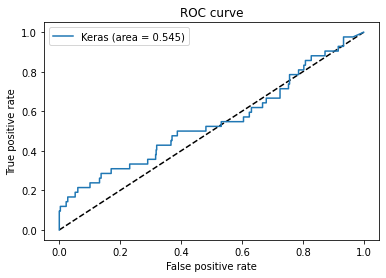

In [453]:

# pilfered from https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a



from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


20/20 [==============================] - 0s 910us/step


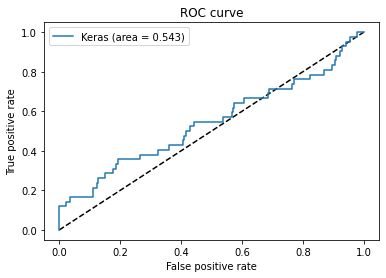

In [343]:
# pilfered from https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a



from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


20/20 [==============================] - 0s 793us/step


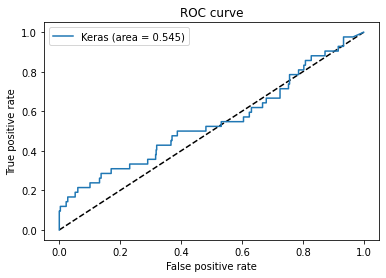

In [362]:
# pilfered from https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a



from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


This ROC curve looks pretty good, but it turns out that i didn't explicitly define valudation set when fitting the model.  So it was overfit.

7/7 [==============================] - 0s 945us/step


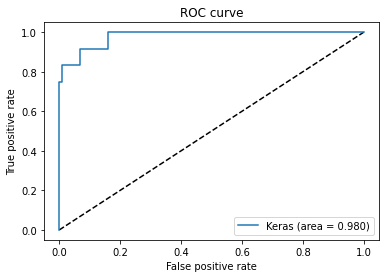

In [366]:

# pilfered from https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a



from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Since the real live data is predomanantly negative outcome (no-whislte). I tried flipping the meaning of the outcome,  negative means a whistle.  looks flipped, I was expecting something else.

7/7 [==============================] - 0s 907us/step


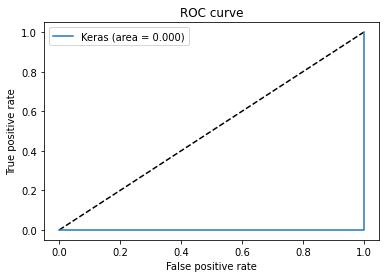

In [350]:
# The trainig dataset is imbalanced, 56 positive examples out of 1064
# Positives are not a majority.  But flipping the labels just seems to transpose the ROC Curve, as in the example below


The trainig dataset is imbalanced, 56 positive examples out of 1064
Positives are not a majority.  But flipping the labels just seems to transpose the ROC Curve

## Save Model

In [364]:
import datetime

a=datetime.datetime.now()
a.month

model.save(model_file_prefix + f"{a.year}{a.month}{a.day}{a.hour}{a.minute}{a.second})

INFO:tensorflow:Assets written to: model_ffn_202272511446/assets


In [345]:
predictions = model.predict(X)
predictions[:9]

97/97 [==============================] - 0s 731us/step


array([[4.04854376e-07],
       [1.98015198e-02],
       [2.84850714e-04],
       [6.38600686e-05],
       [1.45441061e-03],
       [1.78738739e-02],
       [7.65586813e-12],
       [1.01092435e-01],
       [5.80119677e-02]], dtype=float32)

# Inference

you'll need to provide 1 or more inference tensors.  Each tensor comes from feature extraction from single video file.  Run the cells manually.

If you have a ground truth file, you can output a confusion matrix.



### Example 1 

In [259]:
nvr_seen = np.load("5U5A9282_swin_47_95.npy")

In [260]:
predictions2 = model.predict(nvr_seen)

11/11 [==============================] - 0s 1ms/step


In [242]:
len(predictions2)

329

In [356]:
predictions2[:10]


array([[1.3032930e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.2768137e-04],
       [6.9129863e-10],
       [4.0030565e-15],
       [5.8255787e-34],
       [6.5571704e-09],
       [2.7564884e-05],
       [9.1419935e-07]], dtype=float32)

In [425]:
import math
import functools
threshold = 0.6

sr= 44100/2
frame_size_seconds=0.7
frame_length=frame_size_seconds * sr
hop_in_window_divisions = 2
hop_length=frame_size_seconds / hop_in_window_divisions * sr
frame_length_c=math.ceil(frame_length)
frame_length= frame_length_c
hop_length=math.floor(frame_length_c / hop_in_window_divisions)


def positive_frames_to_secs( predictions, threshold):
    time = 0
    results = []
    last_time = -1 
    for i in predictions:
        if i > threshold:
            seconds = math.floor(time / sr * 1000) /1000
            results.append(seconds)
        time = time + hop_length
    return results

def secs_to_min_secmillis(secs):
    if secs <= 60:
        res = f"{secs:.5}"
    else:
        seconds = (secs)%60
        res = f"{math.floor(secs/60)}:{math.floor(seconds):02}.{math.floor(1000*(seconds - math.floor(seconds))):03}"
    return res

def smooth(x,y):
    if len(x) > 0:
        prior = x[-1]
        if y - prior < frame_length / sr:
            # print(f"Tossing {y} {secs_to_min_secmillis(y)} got prior {prior} {secs_to_min_secmillis(prior)} {y - prior} within frame_length {frame_length / sr}")
            pass
        else:
            x.append(y)
    else:
        x.append(y)
    return x
        
def write_times(results, name):
    with open(f"{name}.whistle","a") as f:
        for i in results:
            f.write(i)
            f.write("\n")
            # print(i)
    f.close()
    
def write_positives_to_file(predictions,positive_threshold,filename):
    a = [secs_to_min_secmillis(i) for i in functools.reduce(smooth,positive_frames_to_secs(predictions, positive_threshold),[])]
    write_times(a,filename)
    return a

def secs_frames(ground_truth_secs):
    pass
    
def prep_for_confusion(ground_truth_frames, predictions_frames):
    pass

def generate_m3u(name,secs,extension="MOV",label=None):
    track = [ "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen", "Twenty","Twenty One", "Twenty Two", "Twenty Three", "Twenty Four", "Twenty Five", "Twenty Six", "Twenty Seven", "Twenty Eight", "Twenty Nine", "..." ] 
    bookmark_tmp = "{name=Omi,time=100}"
    a = """
#EXTM3U
#EXTINF:115,NAME.MOV
#EXTVLCOPT:bookmarks=BOOKMARKS
NAME.MOV
"""
    bookmarks = ""
    count = 0
    for i in secs:
        tmp = ("," if count > 0 else "") + str(bookmark_tmp)
        title = track[count] if count < len(track) -1 else track[-1]
        
        if label is not None:
            title = title + " " + label[count]
        
        bookmarks = bookmarks + tmp.replace("Omi", title).replace("100",str(f'{i:0.3f}'))
        count = count + 1
        #print(bookmarks)
        #print(i)
    a = a.replace("BOOKMARKS",bookmarks)
    a = a.replace("NAME",name)
    a = a.replace("MOV",extension)


    return a

def write_m3u(name,contents):
    with open(f"{name}.m3u","a") as f:
        f.write(contents)
    f.close()
    

### Create Playlist

In [415]:

write_m3u("5u5a9273",generate_m3u("5u5a9273",[i for i in functools.reduce(smooth,positive_frames_to_secs(predictions,.5),[])]))

### Create Whistle File

In [ ]:
n="5u5a9273"
write_positives_to_file(predictions,.8,n+"_0.1")


### Example 2


In [440]:
n="5u5a9282"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)

In [451]:
write_m3u("5u5a9282",generate_m3u("5u5a9282",[i for i in functools.reduce(smooth,positive_frames_to_secs(predictions2,.5),[])]))

In [311]:
smooth_confusion_matrix(predictions2, "5u5a9282_.ground_truth.txt", positive_threshold=.6, frame_threshold=2)

Tossing 17.148 17.148 got prior 16.798 16.798 0.3500000000000014 within frame_length 0.7
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[322,   1],
       [  3,   3]])

### More Examples

In [440]:

ngt =  n+"_0.groundtruth.whistle.txt"
smooth_confusion_matrix(predictions3, ngt, positive_threshold=.6, frame_threshold=2)

#smooth_confusion_matrix(predictions2, "5u5a9282_.ground_truth.txt", positive_threshold=.6, frame_threshold=2)

11/11 [==============================] - 0s 934us/step
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[317,   6],
       [  1,   5]])

### sj = np.array(smooth_join(predictions3,ground_truth=ngt, positive_threshold=.5,frame_threshold=2))

# Here we write m3u with TP / FP / FN Labels
secs = [i-0.5 for i in sj[:,0].astype(float)]
labels =[i[:2] for i in sj[:,1]]

write_m3u(n+".3",generate_m3u(n,secs=secs,label=labels))

In [408]:
[secs_to_min_secmillis(i) for i in functools.reduce(smooth,positive_frames_to_secs(predictions2,.5),[])]

['16.799', '35.698', '1:04.045', '1:33.443', '1:40.443']

In [158]:
write_times(predict(.6,predictions2),"5u5a9282_0.6")

In [228]:
write_positives_to_file(predictions2,.1,"5u5a9282_0.1")

In [418]:
n = "5U5A9275"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)
write_m3u(n,generate_m3u(n,[i for i in functools.reduce(smooth,positive_frames_to_secs(predictions3,.5),[])]))
write_positives_to_file(predictions3,.1,n+"_0.1")

8/8 [==============================] - 0s 890us/step


In [419]:
n = "5U5A9278"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)
write_m3u(n,generate_m3u(n,[i for i in functools.reduce(smooth,positive_frames_to_secs(predictions3,.5),[])]))
write_positives_to_file(predictions3,.1,n+"_0.1")

7/7 [==============================] - 0s 1ms/step


In [422]:
n = "IMG_2398"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)
write_m3u(n,generate_m3u(n,[i for i in functools.reduce(smooth,positive_frames_to_secs(predictions3,.1),[])]))
write_positives_to_file(predictions3,.1,n+"_0.1")

5/5 [==============================] - 0s 1ms/step


In [287]:
n="IMG_2365"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)

smooth_confusion_matrix(predictions3, n+"_0.groundtruth.whistle.txt", positive_threshold=.4, frame_threshold=3)

44/44 [==============================] - 0s 721us/step
Tossing 21.698 21.698 got prior 20.998 20.998 0.6999999999999993 within frame_length 0.7
Tossing 464.069 7:44.069 got prior 463.719 7:43.718 0.35000000000002274 within frame_length 0.7
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1355,   14],
       [  24,   14]])

In [430]:
n="IMG_2365"
nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)

smooth_confusion_matrix(predictions3, n+"_0.groundtruth.whistle.txt", positive_threshold=.4, frame_threshold=3)

44/44 [==============================] - 0s 770us/step
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1349,   20],
       [  23,   15]])

In [365]:
n="/Volumes/Stuff/youtube-dl-2/GH020192 [wj1Vc2QSdfI]"

nvr_seen = np.load(n + "_swin_47_95.npy")
predictions3 = model.predict(nvr_seen)

64/64 [==============================] - 0s 737us/step


In [ ]:
write_m3u(n+".2",generate_m3u(n,[i-0.5 for i in functools.reduce(smooth,positive_frames_to_secs(predictions3,.5),[])],extension="webm"))
write_positives_to_file(predictions3,.5,n+"_0.1")

In [321]:
ngt =  n+"_0.groundtruth.whistle.txt"
smooth_confusion_matrix(predictions3, ngt, positive_threshold=.5, frame_threshold=3)

Tossing 654.107 10:54.106 got prior 653.757 10:53.756 0.35000000000002274 within frame_length 0.7
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1951,   15],
       [  41,   14]])

In [359]:
ngt =  n+"_0.groundtruth.whistle.txt"
smooth_confusion_matrix(predictions3, ngt, positive_threshold=.5, frame_threshold=3)

Tossing 180.238 3:00.237 got prior 179.888 2:59.888 0.3499999999999943 within frame_length 0.7
Tossing 220.835 3:40.835 got prior 220.485 3:40.485 0.3499999999999943 within frame_length 0.7
Tossing 230.985 3:50.985 got prior 230.635 3:50.634 0.35000000000002274 within frame_length 0.7
Tossing 333.528 5:33.528 got prior 333.178 5:33.177 0.35000000000002274 within frame_length 0.7
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1951,   15],
       [  43,   12]])

In [371]:
ngt =  n+"_0.groundtruth.whistle.txt"
smooth_confusion_matrix(predictions3, ngt, positive_threshold=.5, frame_threshold=2)

Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1927,   39],
       [  28,   27]])

In [391]:
sj = np.array(smooth_join(predictions3,ground_truth=ngt, positive_threshold=.5,frame_threshold=2))

# Here we write m3u with TP / FP / FN Labels
secs = [i-0.5 for i in sj[:,0].astype(float)]
labels =[i[:2] for i in sj[:,1]]

write_m3u(n+".3",generate_m3u(n,extension="webm",secs=secs,label=labels))
#write_positives_to_file(predictions3,.5,n+"_0.3")

In [148]:
from itertools import takewhile
 
 
# stripComments :: [Char] -> String -> String
def stripComments(cs):
    '''The lines of the input text, with any
       comments (defined as starting with one
       of the characters in cs) stripped out.
    '''
    def go(cs):
        return lambda s: ''.join(
            takewhile(lambda c: c not in cs, s)
        ).strip()
    return lambda txt: '\n'.join(map(
        go(cs),
        txt.splitlines()
    ))
def parseMinSec(cs):
    minute = seconds = 0
  
    if ':' in cs:
        left, right = cs.split(":")
        minute = float(left) * 60
        seconds = float(right)
    else:
        seconds = float(cs)
    
    return minute + seconds


def read(a_file):
    with open(a_file,"r") as f:
        lines = [parseMinSec(stripComments("#")(line.rstrip())) for line in f ]
        return lines

def smooth(x,y):
    if len(x) > 0:
        prior = x[-1]
        if y - prior < frame_length / sr:
            print(f"Tossing {y} {secs_to_min_secmillis(y)} got prior {prior} {secs_to_min_secmillis(prior)} {y - prior} within frame_length {frame_length / sr}")
            pass
        else:
            x.append(y)
    else:
        x.append(y)
    return x


def join(control, prediction, threshold):
    c_l = len(control)
    p_l = len(prediction)
    results = [(-99, "")]
    c_i = 0
    p_i = 0
    r_i = 0

    while True:
        left = control[c_i] if c_i < c_l else None
        right = prediction[p_i] if p_i < p_l else None
        last = results[-1]
        lastval = last[0]

        if left and right:
            diff_lr = (left - right)
            diff_l = (left - lastval)
            diff_r = (right - lastval)

            if threshold > diff_lr >= 0:
                # TP Match

                if threshold > diff_r or threshold > diff_l:
                    results[-1] = (lastval, "TP1")
                else:
                    results.append((left, "TP2"))

                c_i = c_i + 1
                p_i = p_i + 1

                continue

            elif diff_l < diff_r:
                c_i = c_i + 1
                if threshold < diff_l:
                    results.append((left, "FN3"))
                    continue
                else:
                    if "FP" in last[1]:
                        results[-1] = (lastval, "TP4")


            elif diff_l > diff_r:
                p_i = p_i + 1
                if threshold < diff_r:
                    results.append((right, "FP5"))
                    continue
                else:
                    if "FN" in last[1]:
                        results[-1] = (lastval, "TP6")
        elif right:
            diff_r = (right - lastval)
            p_i = p_i + 1
            if threshold < diff_r:
                results.append((right, "FP7"))

            continue
        elif left:
            diff_l = (left - lastval)
            c_i = c_i + 1
            if threshold < diff_l:
                results.append((left, "FN8"))
        else:
            break

    return results[1:]

In [133]:
import numpy as np
list(filter(lambda x:"TP" in x[1], join(np.array(read("IMG_2365_0.groundtruth.whistle.txt")),np.array(read("IMG_2365_0.1.whistle")),(frame_length/sr)*2)))


[(21.562, 'TP6'),
 (45.569, 'TP6'),
 (159.304, 'TP6'),
 (178.589, 'TP6'),
 (200.838, 'TP2'),
 (229.4, 'TP6'),
 (276.132, 'TP2'),
 (298.919, 'TP6'),
 (344.001, 'TP6'),
 (415.387, 'TP6'),
 (430.483, 'TP6'),
 (450.491, 'TP6'),
 (463.659, 'TP6'),
 (485.99, 'TP6')]

In [132]:
list(filter(lambda x:  True or x[0] < (frame_length/sr), functools.reduce(
    lambda x,y: x + [( y[0]- x[-1][1][0],y)] ,join(np.array(
        read("IMG_2365_0.groundtruth.whistle.txt")),np.array(read("IMG_2365_0.1.whistle")),(frame_length/sr)*2),[(0,(0,"Start"))])))

[(0, (0, 'Start')),
 (2.4498, (2.4498, 'FP5')),
 (4.888199999999999, (7.338, 'FN3')),
 (14.224, (21.562, 'TP6')),
 (12.254999999999999, (33.817, 'FN3')),
 (11.752000000000002, (45.569, 'TP6')),
 (21.182000000000002, (66.751, 'FN3')),
 (10.942999999999998, (77.694, 'FP5')),
 (4.117000000000004, (81.811, 'FN3')),
 (5.562999999999988, (87.374, 'FN3')),
 (8.260999999999996, (95.63499999999999, 'FN3')),
 (2.7080000000000126, (98.343, 'FP5')),
 (8.028999999999996, (106.372, 'FN3')),
 (11.819000000000003, (118.191, 'FN3')),
 (9.900000000000006, (128.091, 'FP5')),
 (3.1499999999999773, (131.24099999999999, 'FP5')),
 (5.774000000000001, (137.015, 'FN3')),
 (16.62300000000002, (153.638, 'FN3')),
 (5.665999999999997, (159.304, 'TP6')),
 (13.782999999999987, (173.087, 'FN3')),
 (5.5020000000000095, (178.589, 'TP6')),
 (13.449999999999989, (192.039, 'FN3')),
 (5.881000000000029, (197.92000000000002, 'FN3')),
 (2.917999999999978, (200.838, 'TP2')),
 (14.388000000000005, (215.226, 'FN3')),
 (14.17400

In [242]:
list(filter(lambda x:  True or x[0] < (frame_length/sr), functools.reduce(
    lambda x,y: x + [( y[0]- x[-1][1][0],y)] ,join(np.array(
        read("IMG_2365_0.groundtruth.whistle.txt")),np.array([i for i in functools.reduce(smooth,positive_frames_to_secs(predictions3,.25),[])]),(frame_length/sr)*5),[(0,(0,"Start"))])))

Tossing 21.698 21.698 got prior 20.998 20.998 0.6999999999999993 within frame_length 0.7
Tossing 368.526 6:08.526 got prior 367.826 6:07.826 0.6999999999999886 within frame_length 0.7
Tossing 464.069 7:44.069 got prior 463.719 7:43.718 0.35000000000002274 within frame_length 0.7


[(0, (0, 'Start')),
 (7.338, (7.338, 'TP2')),
 (14.224, (21.562, 'TP2')),
 (12.254999999999999, (33.817, 'TP6')),
 (11.752000000000002, (45.569, 'FN3')),
 (11.126999999999995, (56.696, 'FP5')),
 (10.055000000000007, (66.751, 'FN3')),
 (15.060000000000002, (81.811, 'TP6')),
 (5.562999999999988, (87.374, 'FN3')),
 (3.969999999999999, (91.344, 'FP5')),
 (4.290999999999997, (95.63499999999999, 'TP6')),
 (10.737000000000009, (106.372, 'FN3')),
 (11.819000000000003, (118.191, 'FN3')),
 (18.823999999999984, (137.015, 'FN3')),
 (16.62300000000002, (153.638, 'FN3')),
 (5.665999999999997, (159.304, 'FN3')),
 (13.782999999999987, (173.087, 'FN3')),
 (5.5020000000000095, (178.589, 'FN3')),
 (13.449999999999989, (192.039, 'TP2')),
 (5.881000000000029, (197.92000000000002, 'FN3')),
 (6.815999999999974, (204.736, 'FP5')),
 (10.490000000000009, (215.226, 'TP6')),
 (14.174000000000007, (229.4, 'TP2')),
 (5.783999999999992, (235.184, 'FP5')),
 (6.653999999999996, (241.838, 'FN3')),
 (6.9950000000000045,

In [247]:
smooth_join = join(np.array(
        read("5u5a9273.groundtruth.whistle.txt")),np.array([i for i in functools.reduce(smooth,positive_frames_to_secs(predictions,.5),[])]),(frame_length/sr)*3)

Tossing 156.439 2:36.438 got prior 156.089 2:36.088 0.3499999999999943 within frame_length 0.7
Tossing 158.189 2:38.188 got prior 157.839 2:37.838 0.3499999999999943 within frame_length 0.7
Tossing 291.531 4:51.531 got prior 291.181 4:51.180 0.35000000000002274 within frame_length 0.7
Tossing 347.527 5:47.526 got prior 346.827 5:46.826 0.6999999999999886 within frame_length 0.7


In [217]:
gt = [sr*i/(frame_length/2) for i in np.array(
        read("5u5a9273.groundtruth.whistle.txt"),dtype=float)]
gt

[8.285714285714286,
 32.28571428571429,
 86.8,
 168.99714285714285,
 189.97142857142856,
 235.25714285714287,
 265.7142857142857,
 292.80857142857144,
 319.3085714285715,
 347.86857142857144,
 380.0,
 423.92571428571426,
 500.94,
 557.98,
 619.0857142857143,
 645.8657142857144,
 659.9685714285714,
 696.9114285714286,
 779.1142857142858,
 821.0628571428572,
 853.8314285714285,
 880.3742857142856,
 901.2714285714286,
 929.8514285714285,
 956.5714285714286,
 1018.0514285714285,
 1036.8742857142856,
 1059.1057142857144]

In [215]:
gt2.dtype
np.around(gt2).dtype
np.empty_like(gt,dtype=int)
#np.round(gt,out=np.empty_like(gt,dtype=int)).dtype
gt.dtype

dtype('float64')

In [220]:
gt2 = np.zeros(dtype=int,shape=(len(predictions)))
np.put(gt2, np.round(gt).astype(int), v=1.)



In [229]:
from sklearn.metrics import confusion_matrix
p = np.greater(predictions,.9)
confusion_matrix(gt2, p)

array([[993,  43],
       [ 27,   1]])

In [264]:
def smooth_join(predictions,ground_truth="5u5a9273.groundtruth.whistle.txt", positive_threshold=.5,frame_threshold=3):
    return join(np.array(
        read(ground_truth)),np.array([i for i in functools.reduce(smooth,positive_frames_to_secs(predictions,positive_threshold),[])]),(frame_length/sr)*frame_threshold)

def smooth_confusion_matrix_(predictions, smooth_join):
    gt_smooth = list(map(lambda x: x[0],filter(lambda x:"TP" in x[1] or "FN" in x[1],smooth_join)))
    pred_smooth = list(map(lambda x: x[0],filter(lambda x:"TP" in x[1] or "FP" in x[1],smooth_join)))

    gt2 = np.zeros(dtype=int,shape=(len(predictions)))
    pred2 = np.zeros(dtype=int,shape=(len(predictions)))

    np.put(gt2, np.round(gt_smooth).astype(int), v=1.)
    np.put(pred2, np.round(pred_smooth).astype(int), v=1.)


    from sklearn.metrics import confusion_matrix
    print("""Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 """)

    return confusion_matrix(gt2, pred2)


def smooth_confusion_matrix(predictions, ground_truth, positive_threshold=.5,frame_threshold=3):
    return smooth_confusion_matrix_(predictions, smooth_join(predictions, ground_truth, positive_threshold,frame_threshold))

In [265]:
smooth_confusion_matrix(predictions, "5u5a9273.groundtruth.whistle.txt")

Tossing 156.439 2:36.438 got prior 156.089 2:36.088 0.3499999999999943 within frame_length 0.7
Tossing 158.189 2:38.188 got prior 157.839 2:37.838 0.3499999999999943 within frame_length 0.7
Tossing 291.531 4:51.531 got prior 291.181 4:51.180 0.35000000000002274 within frame_length 0.7
Tossing 347.527 5:47.526 got prior 346.827 5:46.826 0.6999999999999886 within frame_length 0.7
Thus in binary classification, the count of true negatives is 
C0,0, false negatives is C1,0, true positives is 
C1,1 and false positives is C0,1 


array([[1008,   28],
       [  14,   14]])

In [446]:
import keras 
model2  = keras.models.load_model('model_ffn_202272511446')

model_2

In [447]:
model2